## Quick cleaning and storing data before we start.
## Ridge regression starts below, after the 'to_csv()' call

In [25]:
import pandas as pd

df = pd.read_csv('data_CL0_withsent.csv', parse_dates = ['pub_date'], encoding="ISO-8859-1")

In [26]:
df.head()

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content_words
0,1,"Aberfeldy recorded their debut, Young Forever, using a single microphone. Good for them. In that\r\r\n spirit, I'll cut short my obligatory introduction and bring you straight to the Edinburg...",rock,rough trade,young forever,aberfeldy,http://pitchfork.com/reviews/albums/1-young-forever/,3.4,0,marc hogan,senior staff writer,2004-08-30,0,30,8,2004,2004.0,577
1,6,Can there be any purpose behind a master's degree in the psychology of music other than inevitably attempting\r\r\n to rule the minds of men through the manipulative powers of sound? I submit ...,electronic,silber,pure tone audiometry,aarktica,http://pitchfork.com/reviews/albums/6-pure-tone-audiometry/,7.4,0,eric carr,contributor,2003-04-08,1,8,4,2003,2003.0,702
2,7,Funny what gets tagged for popular comebacks these days-- post-punk\r\r\r\n and electro are the two flavors experiencing the strongest resurgence\r\r\r\n right now. Shoegazers have been pin...,electronic,darla,or you could just go through your whole life and be happy anyway,aarktica,http://pitchfork.com/reviews/albums/7-or-you-could-just-go-through-your-whole-life-and-be-happy-anyway/,8.1,0,christopher dare,NaN,2002-05-16,3,16,5,2002,2002.0,661
3,8,"Aarktica didn't seem to know what he was on 2002's ...Or You Could Just Go Through Your Whole Life and Be Happy Anyway. Jon De Rosa meshed somnolent ambient soundscapes and shoegazer melodies, dra...",electronic,darla,bleeding light,aarktica,http://pitchfork.com/reviews/albums/8-bleeding-light/,7.2,0,sam ubl,NaN,2005-02-06,6,6,2,2005,2005.0,388
4,10,"ABCS are all about unity. Their bandname comes from the first\r\r\r\n letters of their last names, and their album cover shows three\r\r\r\n slightly slouching skeletons all decked out in a...",jazz,troubleman unlimited,abcs,abcs,http://pitchfork.com/reviews/albums/10-abcs/,8.0,0,michael bernstein,NaN,2002-05-07,1,7,5,2002,2002.0,323


### The dataframe does not have sentiment analysis
### Do sentiment analysis and save the dataframe as csv

In [27]:
from textblob import TextBlob

df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment)
df['subjectivity'] = df['sentiment'].map(lambda x: x.subjectivity)
df['polarity'] = df['sentiment'].map(lambda x: x.polarity)

df.drop('sentiment', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18378 entries, 0 to 18377
Data columns (total 20 columns):
reviewid          18378 non-null int64
content           18378 non-null object
genre             16015 non-null object
label             18331 non-null object
title             18376 non-null object
artist            18376 non-null object
url               18378 non-null object
score             18378 non-null float64
best_new_music    18378 non-null int64
author            18378 non-null object
author_type       14477 non-null object
pub_date          18378 non-null datetime64[ns]
pub_weekday       18378 non-null int64
pub_day           18378 non-null int64
pub_month         18378 non-null int64
pub_year          18378 non-null int64
year              17972 non-null float64
content_words     18378 non-null int64
subjectivity      18378 non-null float64
polarity          18378 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(7), object(8)
memory usage: 2.8+ MB


In [28]:
df.loc[df.artist.isnull()]

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content_words,subjectivity,polarity
14962,18989,"Do you have a meaningful relationship with the music of Deftones? Are you in a meaningful relationship with someone who does? If thats the case, I dont think I need to tell you the code we follo...",NaN,sumerian,NaN,NaN,http://pitchfork.com/reviews/albums/18989-crosses-/,5.0,0,ian cohen,contributor,2014-02-12,2,12,2,2014,2014.0,1134,0.498489,0.136969
15000,19032,"The Finnish musician Mika Vainio appears to have very little use for trends: For 30 years, in a variety of collaborative contexts and with a panoply of solo guises, Vainio has doggedly explored th...",NaN,sahko,konstellaatio,NaN,http://pitchfork.com/reviews/albums/19032-artist-konstellaatio/,7.4,0,grayson haver currin,contributor,2014-02-27,3,27,2,2014,2014.0,762,0.468936,0.107260


In [29]:
df.set_value(15000, 'artist', 'scandinavian o')
df.loc[df.artist.isnull()]

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content_words,subjectivity,polarity
14962,18989,"Do you have a meaningful relationship with the music of Deftones? Are you in a meaningful relationship with someone who does? If thats the case, I dont think I need to tell you the code we follo...",NaN,sumerian,NaN,NaN,http://pitchfork.com/reviews/albums/18989-crosses-/,5.0,0,ian cohen,contributor,2014-02-12,2,12,2,2014,2014.0,1134,0.498489,0.136969


In [14]:
pd.options.display.max_colwidth = 200

In [15]:
df.loc[df.artist.isnull()]

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content_words,subjectivity,polarity
14962,18989,"Do you have a meaningful relationship with the music of Deftones? Are you in a meaningful relationship with someone who does? If thats the case, I dont think I need to tell you the code we follo...",NaN,sumerian,NaN,NaN,http://pitchfork.com/reviews/albums/18989-crosses-/,5.0,0,ian cohen,contributor,2014-02-12,2,12,2,2014,2014.0,1134,0.498489,0.136969


In [30]:
df.set_value(14962, 'artist', 'crosses')
df.set_value(14962, 'title', '†††')

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content_words,subjectivity,polarity
0,1,"Aberfeldy recorded their debut, Young Forever, using a single microphone. Good for them. In that\r\r\n spirit, I'll cut short my obligatory introduction and bring you straight to the Edinburg...",rock,rough trade,young forever,aberfeldy,http://pitchfork.com/reviews/albums/1-young-forever/,3.4,0,marc hogan,senior staff writer,2004-08-30,0,30,8,2004,2004.0,577,0.499441,0.143242
1,6,Can there be any purpose behind a master's degree in the psychology of music other than inevitably attempting\r\r\n to rule the minds of men through the manipulative powers of sound? I submit ...,electronic,silber,pure tone audiometry,aarktica,http://pitchfork.com/reviews/albums/6-pure-tone-audiometry/,7.4,0,eric carr,contributor,2003-04-08,1,8,4,2003,2003.0,702,0.563256,0.072756
2,7,Funny what gets tagged for popular comebacks these days-- post-punk\r\r\r\n and electro are the two flavors experiencing the strongest resurgence\r\r\r\n right now. Shoegazers have been pin...,electronic,darla,or you could just go through your whole life and be happy anyway,aarktica,http://pitchfork.com/reviews/albums/7-or-you-could-just-go-through-your-whole-life-and-be-happy-anyway/,8.1,0,christopher dare,NaN,2002-05-16,3,16,5,2002,2002.0,661,0.521160,0.129409
3,8,"Aarktica didn't seem to know what he was on 2002's ...Or You Could Just Go Through Your Whole Life and Be Happy Anyway. Jon De Rosa meshed somnolent ambient soundscapes and shoegazer melodies, dra...",electronic,darla,bleeding light,aarktica,http://pitchfork.com/reviews/albums/8-bleeding-light/,7.2,0,sam ubl,NaN,2005-02-06,6,6,2,2005,2005.0,388,0.584946,0.131989
4,10,"ABCS are all about unity. Their bandname comes from the first\r\r\r\n letters of their last names, and their album cover shows three\r\r\r\n slightly slouching skeletons all decked out in a...",jazz,troubleman unlimited,abcs,abcs,http://pitchfork.com/reviews/albums/10-abcs/,8.0,0,michael bernstein,NaN,2002-05-07,1,7,5,2002,2002.0,323,0.379904,0.071546
5,11,"If you caught this little blip in the mid-90s, you must have had a pretty sensitive radar, or at least an\r\r\n intense interest in what was going on over at legendary house of twee-focused Sar...",rock,better looking,homesick and happy to be here,aberdeen,http://pitchfork.com/reviews/albums/11-homesick-and-happy-to-be-here/,7.0,0,joe tangari,contributor,2002-11-04,0,4,11,2002,2002.0,524,0.584191,0.171292
6,12,"The Portland Trailblazers, Christmas fruitcakes, and the cast ofThe Man in\r\r\n the Iron Mask all suffer from the same malady: each is considerably less\r\r\n than the sum of its parts. Yo...",metal,slowdime,abilene,abilene,http://pitchfork.com/reviews/albums/12-abilene/,7.0,0,camilo arturo leslie,NaN,2000-12-31,6,31,12,2000,2001.0,625,0.490637,0.168480
7,15,"Brad Nessler: Welcome to our wrap-up of Game Four between the East Coast and West Coast Hip-Hop Finals. I'm joined as always by the mookiest color commentary in the league, Bill Russell\r\r\n a...",rap,deconstruction,love & hate,aceyalone,http://pitchfork.com/reviews/albums/15-love-hate/,6.7,0,andy beta,contributor,2003-06-15,6,15,6,2003,2003.0,848,0.459102,-0.015337
8,16,"Aceyalone's transcendent smoothness is such that he can reference Laverne and Shirley and the overweight lover Heavy D in the same song, back to back. Both references seriously represent for the l...",rap,project blowed,hip hop and the world we live in,aceyalone,http://pitchfork.com/reviews/albums/16-hip-hop-and-the-world-we-live-in/,7.5,0,julianne escobedo shepherd,contributor,2003-03-02,6,2,3,2003,2003.0,585,0.436306,0.089540
9,17,"A word of advice to all would-be musicians: the manifesto, while it has\r\r\n certainly proved its worth to terrorists and psychopaths alike, may be one\r\r\n literary form to steer clear of...",rap,project blowed,accepted eclectic,aceyalone,http://pitch

In [31]:
df.loc[df.artist.isnull()]

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content_words,subjectivity,polarity


In [32]:
df.loc[df.title.isnull()]

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content_words,subjectivity,polarity
6873,10321,"Everyone should be wary of pulling out the following two statements, but they fit Justice like a pair of $500 jeans: 1) If it's too loud, you're too old, and 2) Age ain't nothin' but a number. Giv...",electronic,because,NaN,justice,http://pitchfork.com/reviews/albums/10321-justice/,8.4,1,jess harvell,contributor,2007-06-12,1,12,6,2007,2007.0,832,0.456959,0.10969


In [33]:
df.set_value(6873, 'title', 'cross')
df.loc[df.title.isnull()]

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content_words,subjectivity,polarity


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18378 entries, 0 to 18377
Data columns (total 20 columns):
reviewid          18378 non-null int64
content           18378 non-null object
genre             16015 non-null object
label             18331 non-null object
title             18378 non-null object
artist            18378 non-null object
url               18378 non-null object
score             18378 non-null float64
best_new_music    18378 non-null int64
author            18378 non-null object
author_type       14477 non-null object
pub_date          18378 non-null datetime64[ns]
pub_weekday       18378 non-null int64
pub_day           18378 non-null int64
pub_month         18378 non-null int64
pub_year          18378 non-null int64
year              17972 non-null float64
content_words     18378 non-null int64
subjectivity      18378 non-null float64
polarity          18378 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(7), object(8)
memory usage: 2.8+ MB


In [35]:
df.to_csv('pitchfork18378_w_sentiment.csv')

## Ridge Regression

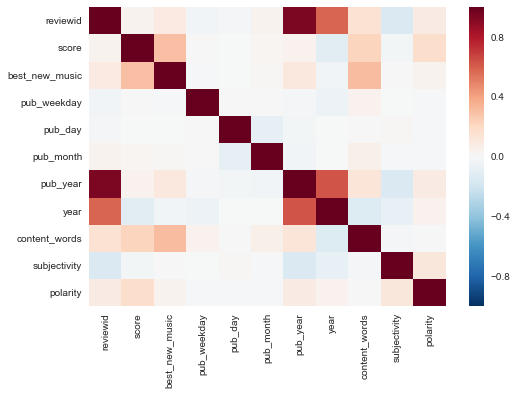

In [103]:
import seaborn as sns
corr = df.corr()

sns.heatmap(corr)

In [84]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}, x_tofrom = (0, len(data))):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['score'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        x_coords = list(range(len(y_pred)))
        plt.plot(x_coords,data['score'],'.')
        plt.plot(x_coords,y_pred)
        plt.title('Plot for alpha: %.3g'%alpha)
        plt.xlim(x_tofrom[0], x_tofrom[1])
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['score'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [85]:
predictors=['content_words', 'pub_month', 'subjectivity', 'polarity']

#Set the different values of alpha to be tested
alpha_ridge = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_%s'%x for x in predictors]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]


coef_matrix_ridge_low_scores = pd.DataFrame(index=ind, columns=col)

models_to_plot = {key:value for key, value in (zip(alpha_ridge, list(range(331, 340)))) }


In [60]:
data = df[['content_words', 'pub_month', 'subjectivity', 'polarity', 'score']].sort_values(by = ['score'])
print(data.head())
print(data.tail())

      content_words  pub_month  subjectivity  polarity  score
3482           1196          9      0.461178  0.041427    0.0
4547            998          4      0.476413  0.023753    0.0
3978            716          4      0.556080  0.114293    0.0
7113            934          8      0.422695  0.099765    0.0
3913            956          6      0.584333  0.072943    0.0
      content_words  pub_month  subjectivity  polarity  score
972            1081         10      0.426272  0.107737   10.0
932            1143          9      0.494450  0.064713   10.0
6878           1167          6      0.452064  0.092614   10.0
9768           1452          9      0.479271  0.192467   10.0
9770           1131          9      0.503528  0.158671   10.0


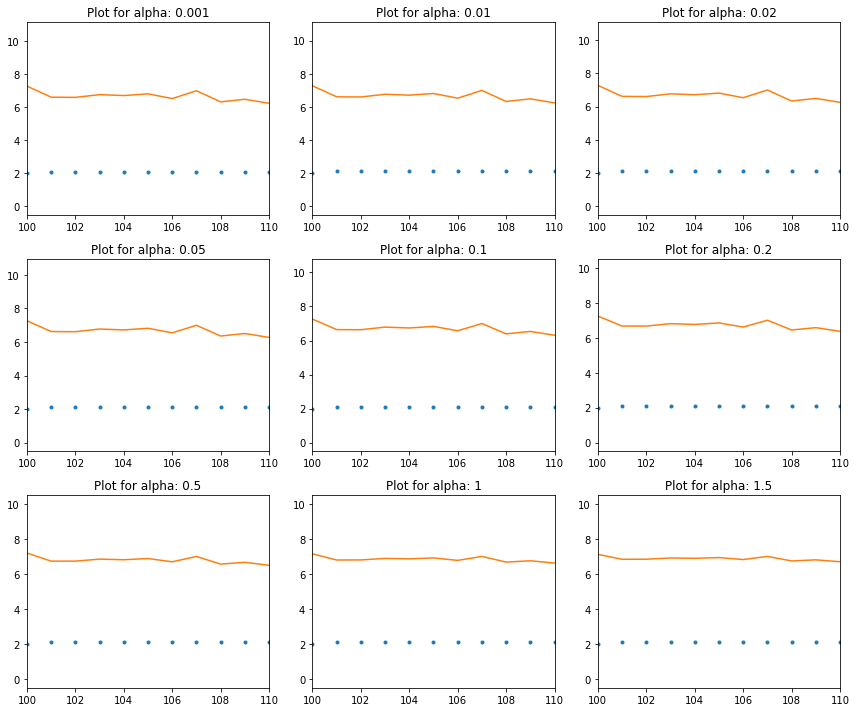

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
for i in range(10):
    coef_matrix_ridge_low_scores.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot, (100,110))

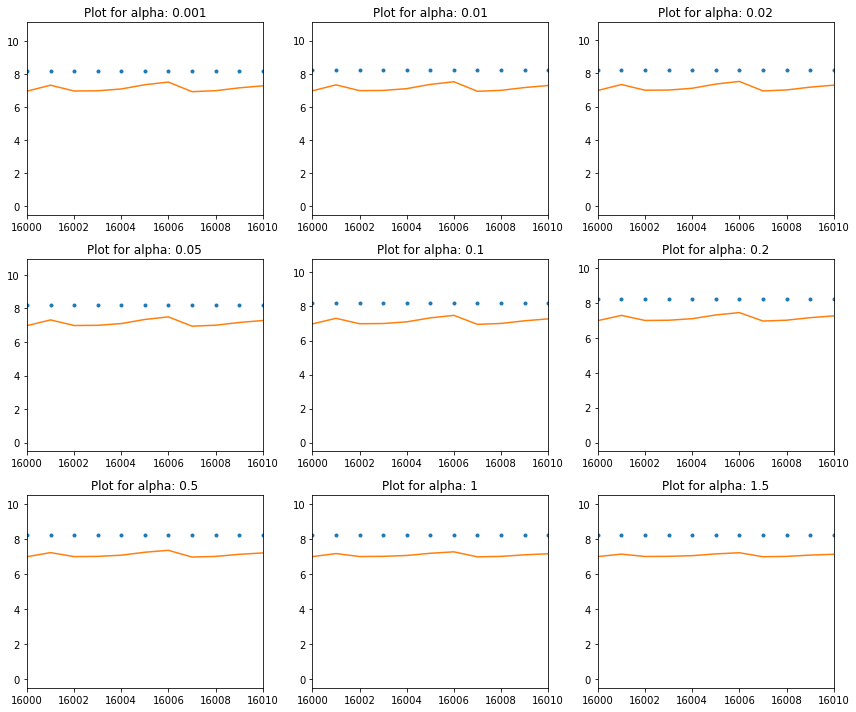

In [79]:
coef_matrix_ridge_high_scores = pd.DataFrame(index=ind, columns=col)
for i in range(10):
    coef_matrix_ridge_high_scores.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot, (16000, 16010))

In [80]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge_low_scores

,rss,intercept,coef_content_words,coef_pub_month,coef_subjectivity,coef_polarity
alpha_0.001,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_0.01,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_0.02,2.8e+04,6.3,0.0011,0.0033,-1.1,3.9
alpha_0.05,2.8e+04,6.3,0.0011,0.0033,-1,3.8
alpha_0.1,2.8e+04,6.3,0.001,0.0033,-0.98,3.6
alpha_0.2,2.8e+04,6.4,0.00095,0.0033,-0.88,3.3
alpha_0.5,2.9e+04,6.5,0.00076,0.0032,-0.65,2.6
alpha_1,2.9e+04,6.6,0.00057,0.0028,-0.46,2
alpha_1.5,2.9e+04,6.7,0.00046,0.0024,-0.35,1.6
alpha_2,2.9e+04,6.7,0.00038,0.0021,-0.28,1.3


### Try higher alpha values

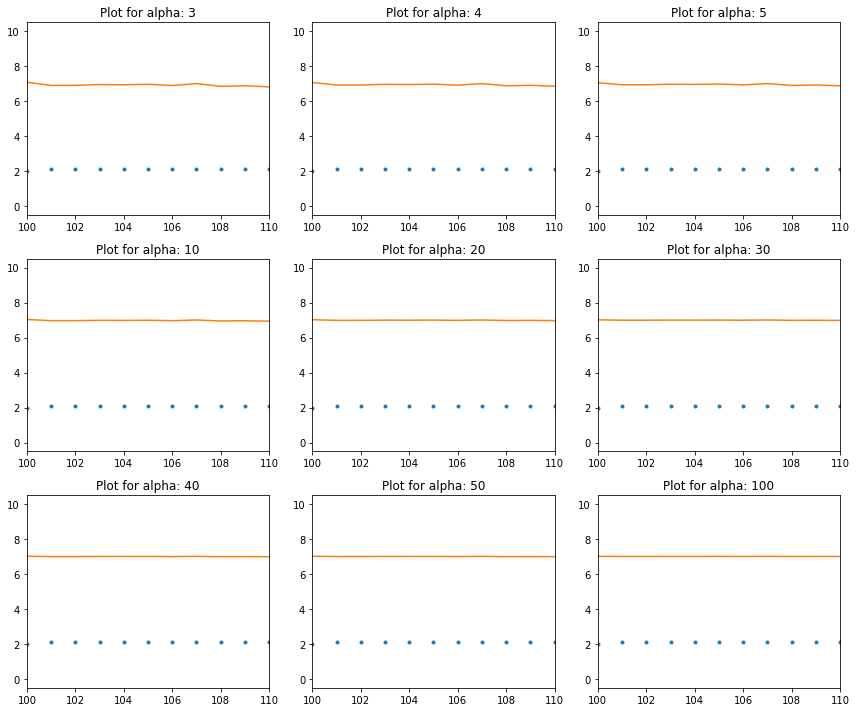

In [88]:
#Set the different values of alpha to be tested
alpha_ridge = [3, 4, 5, 10, 20, 30, 40, 50, 100, 200]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_%s'%x for x in predictors]
ind = ['alpha_%d'%alpha_ridge[i] for i in range(0,10)]

models_to_plot = {key:value for key, value in (zip(alpha_ridge, list(range(331, 340)))) }

coef_matrix_ridge_high_alphas_low_scores = pd.DataFrame(index=ind, columns=col)
for i in range(10):
    coef_matrix_ridge_high_alphas_low_scores.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot, (100,110))

In [87]:
coef_matrix_ridge_high_alphas_low_scores

,rss,intercept,coef_content_words,coef_pub_month,coef_subjectivity,coef_polarity
alpha_3,3e+04,6.8,0.00029,0.0017,-0.2,0.98
alpha_4,3e+04,6.8,0.00023,0.0014,-0.16,0.78
alpha_5,3e+04,6.9,0.00019,0.0012,-0.13,0.65
alpha_10,3e+04,6.9,0.0001,0.00067,-0.068,0.35
alpha_20,3e+04,7,5.5e-05,0.00036,-0.035,0.19
alpha_30,3.1e+04,7,3.7e-05,0.00024,-0.023,0.13
alpha_40,3.1e+04,7,2.8e-05,0.00019,-0.018,0.095
alpha_50,3.1e+04,7,2.2e-05,0.00015,-0.014,0.076
alpha_100,3.1e+04,7,1.1e-05,7.6e-05,-0.0071,0.039
alpha_200,3.1e+04,7,5.7e-06,3.8e-05,-0.0036,0.019


## More extreme alpha values

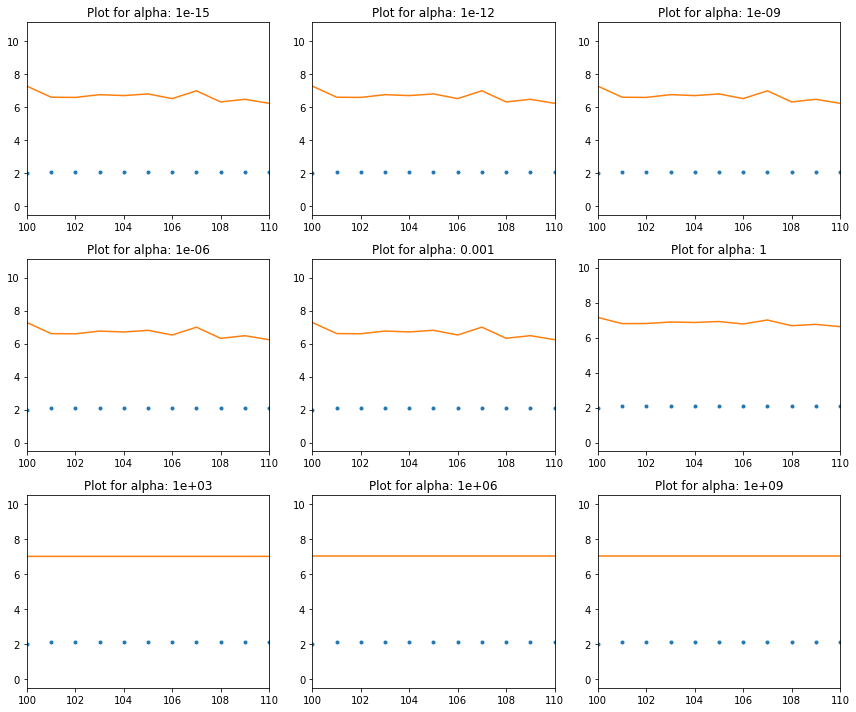

In [89]:
#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-12, 1e-9, 1e-6, 1e-3, 1, 1e+3, 1e+6, 1e+9, 1e+12]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_%s'%x for x in predictors]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]

models_to_plot = {key:value for key, value in (zip(alpha_ridge, list(range(331, 340)))) }

coef_matrix_ridge_high_alphas_low_scores = pd.DataFrame(index=ind, columns=col)
for i in range(10):
    coef_matrix_ridge_high_alphas_low_scores.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot, (100,110))

In [90]:
coef_matrix_ridge_high_alphas_low_scores

,rss,intercept,coef_content_words,coef_pub_month,coef_subjectivity,coef_polarity
alpha_1e-15,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_1e-12,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_1e-09,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_1e-06,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_0.001,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_1,2.9e+04,6.6,0.00057,0.0028,-0.46,2
alpha_1e+03,3.1e+04,7,1.1e-06,7.7e-06,-0.00071,0.0039
alpha_1e+06,3.1e+04,7,1.1e-09,7.7e-09,-7.1e-07,3.9e-06
alpha_1e+09,3.1e+04,7,1.1e-12,7.7e-12,-7.1e-10,3.9e-09
alpha_1e+12,3.1e+04,7,1.1e-15,7.7e-15,-7.1e-13,3.9e-12


## It looks like Ridge is not yielding great results 
## Let's try Lasso Regression

In [96]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}, x_tofrom = (0, len(data))):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e8)
    lassoreg.fit(data[predictors],data['score'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha      
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        x_coords = list(range(len(y_pred)))
        plt.plot(x_coords,data['score'],'.')
        plt.plot(x_coords,y_pred)
        plt.title('Plot for alpha: %.3g'%alpha)
        plt.xlim(x_tofrom[0], x_tofrom[1])
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['score'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

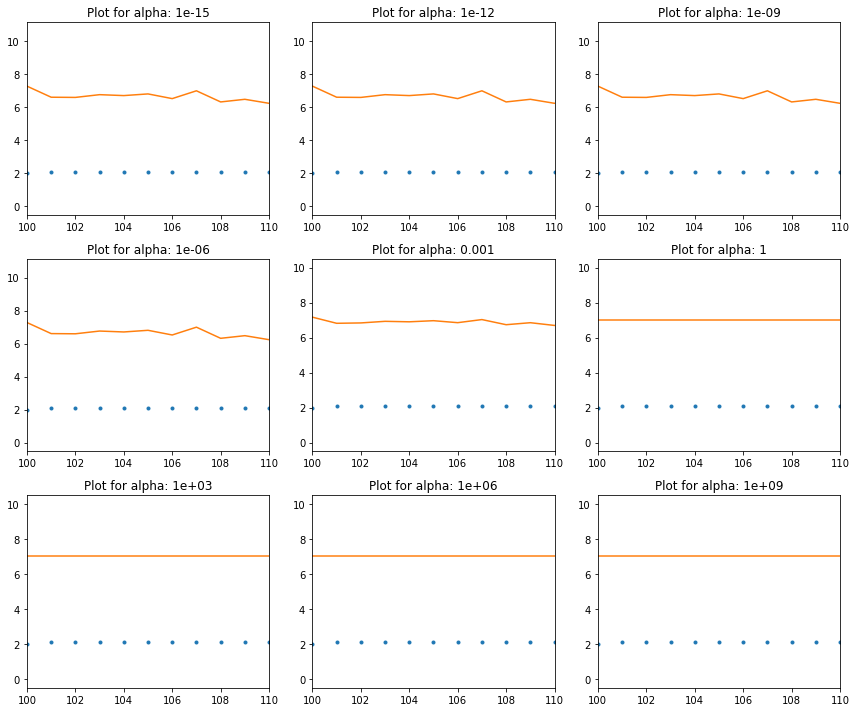

In [97]:
#Set the different values of alpha to be tested
alpha_lasso = alpha_ridge 

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_%s'%x for x in predictors]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]

models_to_plot = {key:value for key, value in (zip(alpha_lasso, list(range(331, 340)))) }

coef_matrix_lasso_low_scores = pd.DataFrame(index=ind, columns=col)
for i in range(10):
    coef_matrix_lasso_low_scores.iloc[i,] = lasso_regression(data, predictors, alpha_ridge[i], models_to_plot, (100,110))

In [98]:
coef_matrix_lasso_low_scores

,rss,intercept,coef_content_words,coef_pub_month,coef_subjectivity,coef_polarity
alpha_1e-15,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_1e-12,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_1e-09,2.8e+04,6.3,0.0011,0.0033,-1.1,4
alpha_1e-06,2.8e+04,6.3,0.0011,0.0032,-1.1,4
alpha_0.001,2.9e+04,6.4,0.0006,0,-0,1.5
alpha_1,3.1e+04,7,0,0,-0,0
alpha_1e+03,3.1e+04,7,0,0,-0,0
alpha_1e+06,3.1e+04,7,0,0,-0,0
alpha_1e+09,3.1e+04,7,0,0,-0,0
alpha_1e+12,3.1e+04,7,0,0,-0,0


### The result is pretty similar for Lasso Regression

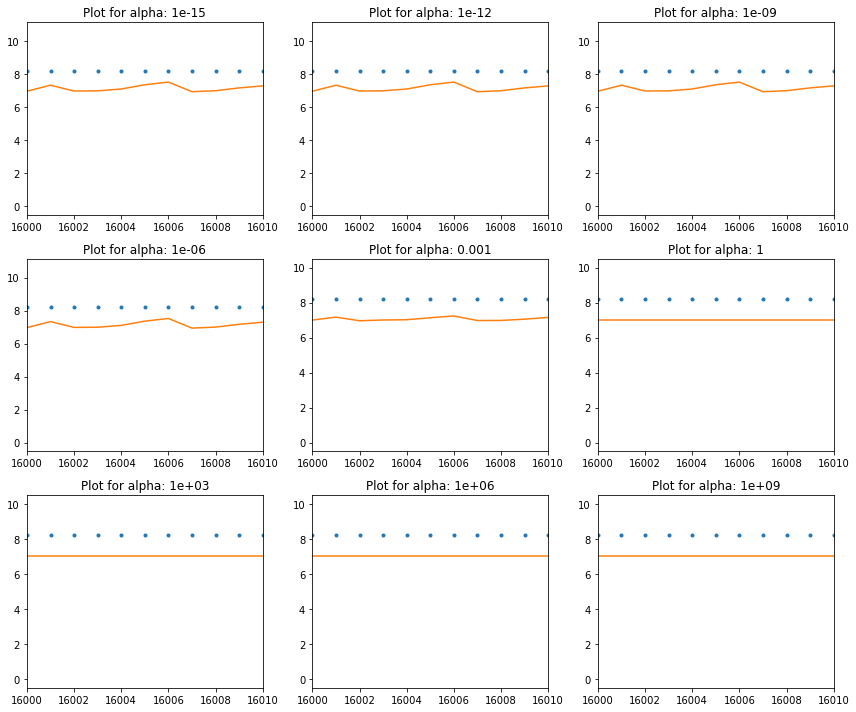

In [99]:
coef_matrix_lasso_high_scores = pd.DataFrame(index=ind, columns=col)
for i in range(10):
    coef_matrix_lasso_high_scores.iloc[i,] = lasso_regression(data, predictors, alpha_ridge[i], models_to_plot, (16000,16010))

### Based on the table of Lasso Regression results, it looks like it selects 'content_words' (number of words published in a particular review), and 'polarity' as the main predictors (see line 'alpha_0.001')

### Since Ridge and Lasso Regressions returned similar, and poor results, it does not make sense to also try Elastic Net, as it combines Ridge and Lasso's advantages. It's safe to expect that Elastic Net will return something similar to what the other two returned.